# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

**Potential data sources**

- tidy tuesday: https://github.com/rfordatascience/tidytuesday/tree/master

- fivethirtyeight: https://github.com/fivethirtyeight/data

- CDC: 

- Out world in data: https://ourworldindata.org

In [1]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


For this analysis, I have chosen to look at the [coffee_survey](https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv) dataset from Tidy Tuesday. 

In [2]:
#Let's read in the dataset

coffee = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-05-14/coffee_survey.csv')

coffee |> head()

Rows: 4042 Columns: 57
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (44): submission_id, age, cups, where_drink, brew, brew_other, purchase,...
dbl (13): expertise, coffee_a_bitterness, coffee_a_acidity, coffee_a_persona...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,⋯,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
gMR29l,18-24 years old,NA,NA,NA,NA,NA,NA,Regular drip coffee,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BkPN0e,25-34 years old,NA,NA,Pod/capsule machine (e.g. Keurig/Nespresso),NA,NA,NA,Iced coffee,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
W5G8jj,25-34 years old,NA,NA,Bean-to-cup machine,NA,NA,NA,Regular drip coffee,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4xWgGr,35-44 years old,NA,NA,Coffee brewing machine (e.g. Mr. Coffee),NA,NA,NA,Iced coffee,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
QD27Q8,25-34 years old,NA,NA,Pour over,NA,NA,NA,Latte,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
V0LPeM,55-64 years old,NA,NA,"Pod/capsule machine (e.g. Keurig/Nespresso), Espresso, French press",NA,NA,NA,Iced coffee,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
#I'm interested in the number of cups of coffee different age groups consume

coffee|> 
    group_by(age) |>
    summarize(N = n())

age,N
<chr>,<int>
18-24 years old,461
25-34 years old,1986
35-44 years old,960
45-54 years old,302
55-64 years old,187
<18 years old,20
>65 years old,95
NA,31


In [4]:
coffee_clean = coffee |>
  filter(!is.na(age) & !is.na(cups)) |>  # Remove rows with NA in age and coffee_consumption
  mutate(cups = factor(cups, 
                        levels = c("Less than 1", "1", "2", "3", "4", "More than 4"),
                            ordered = TRUE))  # Define levels and order

head(coffee_clean)

submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,⋯,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
<chr>,<chr>,<ord>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LbWda2,25-34 years old,Less than 1,At a cafe,NA,NA,NA,NA,Regular drip coffee,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7WWB4A,<18 years old,2,"On the go, At a cafe, At home, At the office","Pour over, Coffee brewing machine (e.g. Mr. Coffee), Espresso, Bean-to-cup machine",NA,"Local cafe, Specialty coffee shop",NA,Other,cortado,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
pKL8aB,25-34 years old,1,At the office,NA,NA,NA,NA,Pourover,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Zd694B,<18 years old,3,"At home, At the office, At a cafe","Pour over, Espresso, Instant coffee",NA,NA,NA,Pourover,NA,⋯,NA,NA,Other (please specify),Cis,Bachelor's degree,Other (please specify),Alaskan native,Employed full-time,More than 3,Democrat
QAeYZY,>65 years old,3,"At the office, At a cafe",NA,NA,NA,NA,Cortado,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
QA5JYA,25-34 years old,1,"At home, At the office, On the go","Pour over, Coffee brewing machine (e.g. Mr. Coffee)",NA,"National chain (e.g. Starbucks, Dunkin), Local cafe, Specialty coffee shop",NA,Regular drip coffee,NA,⋯,NA,NA,Female,NA,Bachelor's degree,White/Caucasian,NA,Employed full-time,None,Democrat


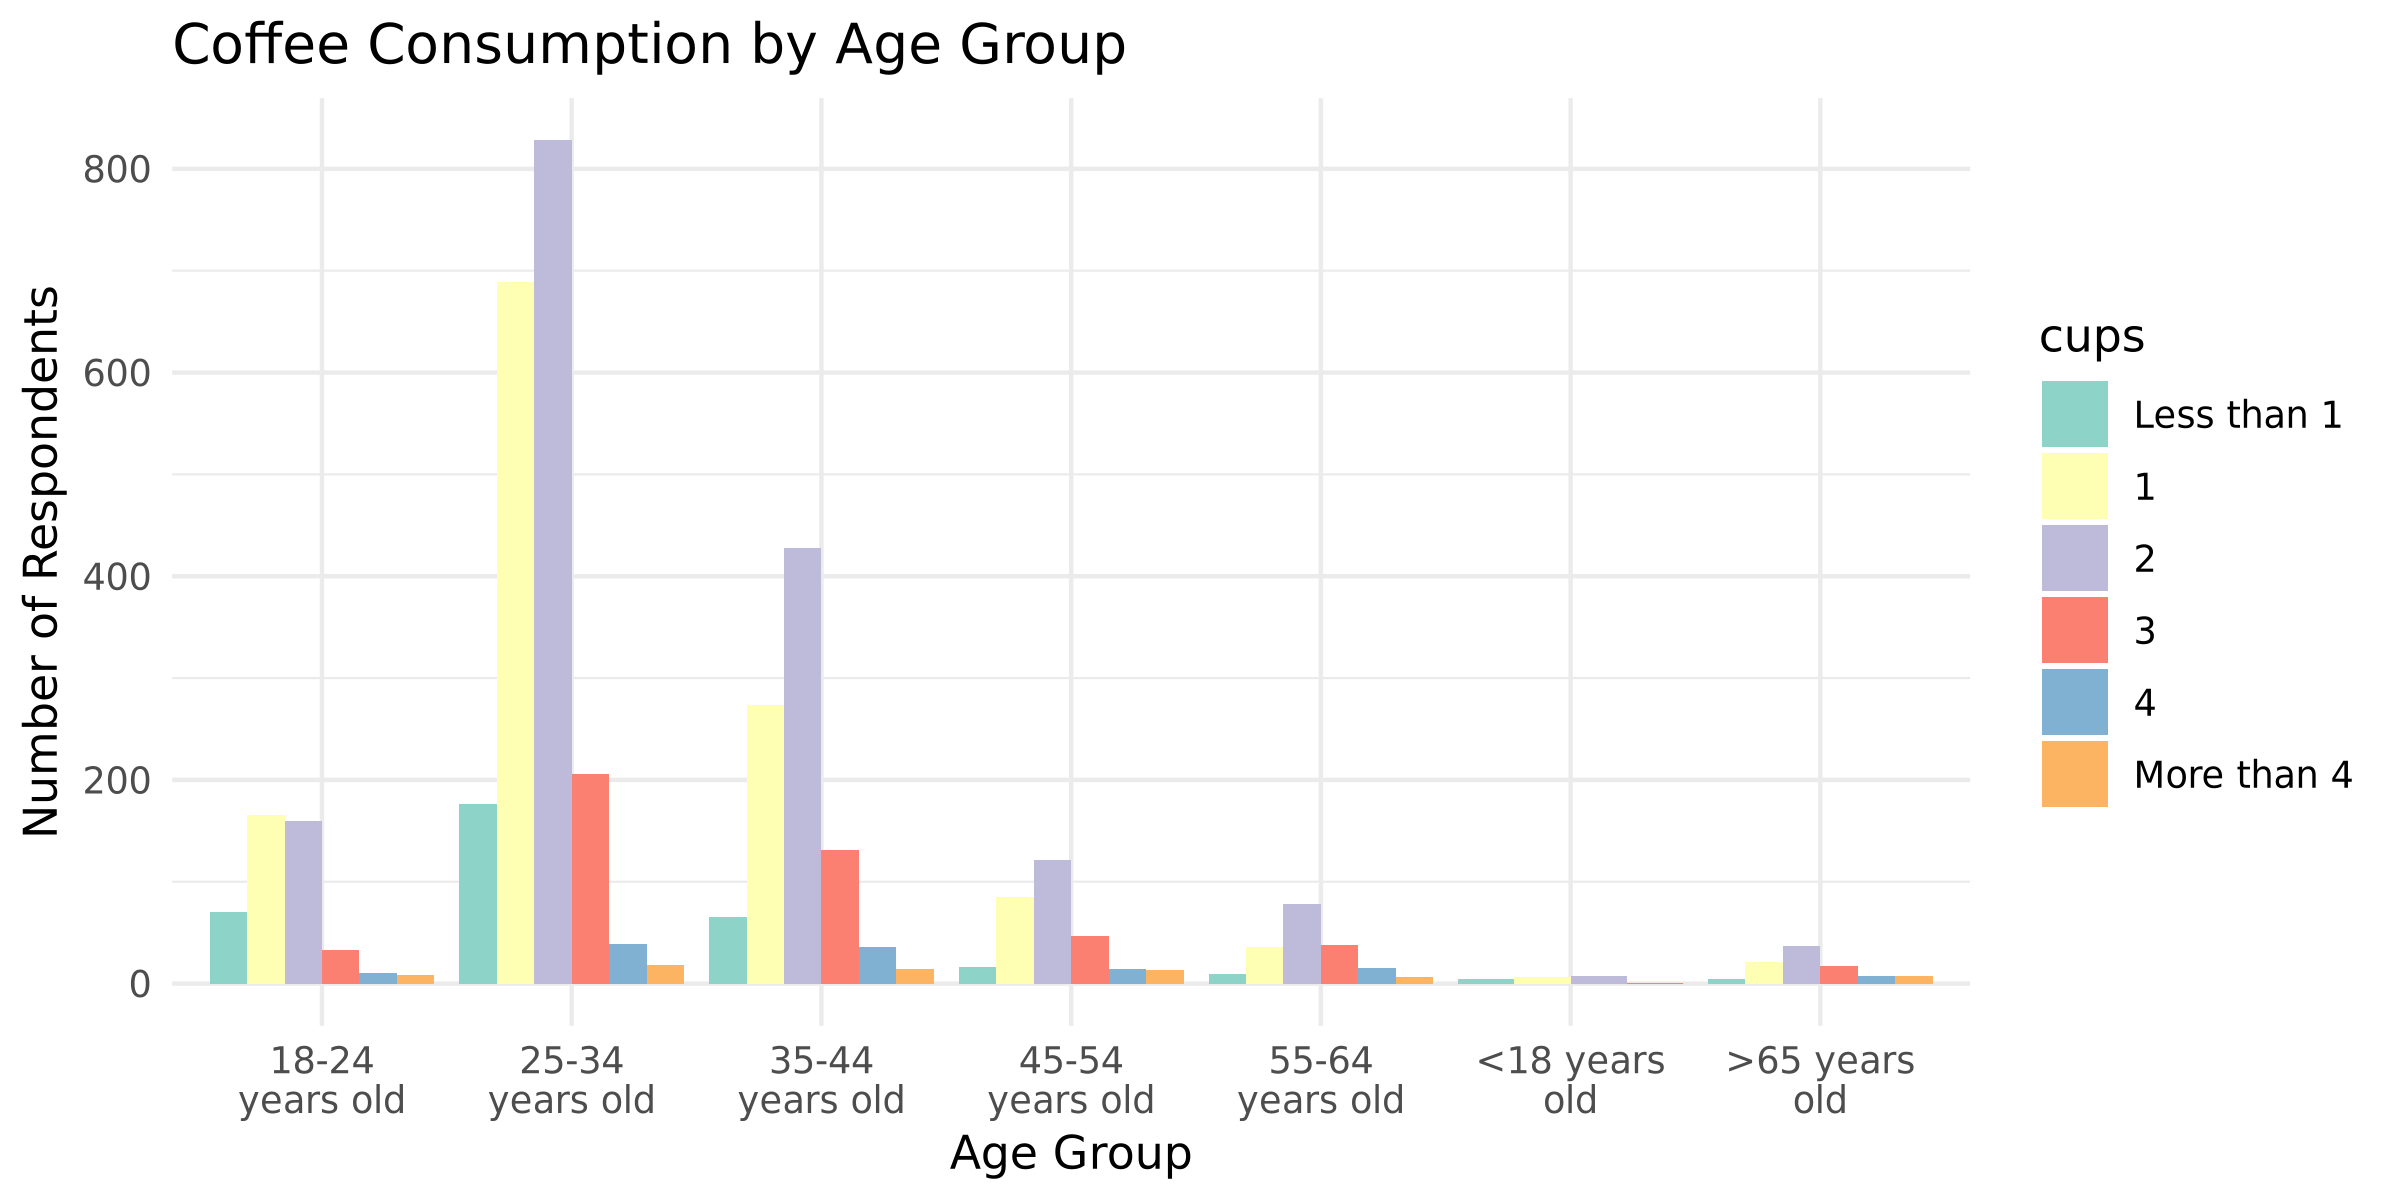

In [5]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)

# Plotting the distribution of coffee consumption by age group
ggplot(coffee_clean, aes(x = age, fill = cups)) +
    geom_bar(position = "dodge", na.rm = TRUE) +  
    labs(title = "Coffee Consumption by Age Group",
       x = "Age Group",
       y = "Number of Respondents") +
    theme_minimal() +
    scale_fill_brewer(palette = "Set3") +
    scale_x_discrete(labels = function(x) str_wrap(x, width = 10))

**Plot interpretation for coffee consumption by age group**

The purpose of the above plot is to visualize the daily coffee consumption limit for all the different age groups side by side. From the output obtained, we see that 2 cups of coffee is the most common daily coffee coffee consumption limit for each age group. One cup of coffee is the next most common daily intake. It is possible that many of the survey respondents are not heavy coffee drinkers. It is also possible that respondents are aware of the potential effects of high caffeine consumption and may be underreporting their daily intake, which is a potential source of bias in surveys that is difficult to control. 

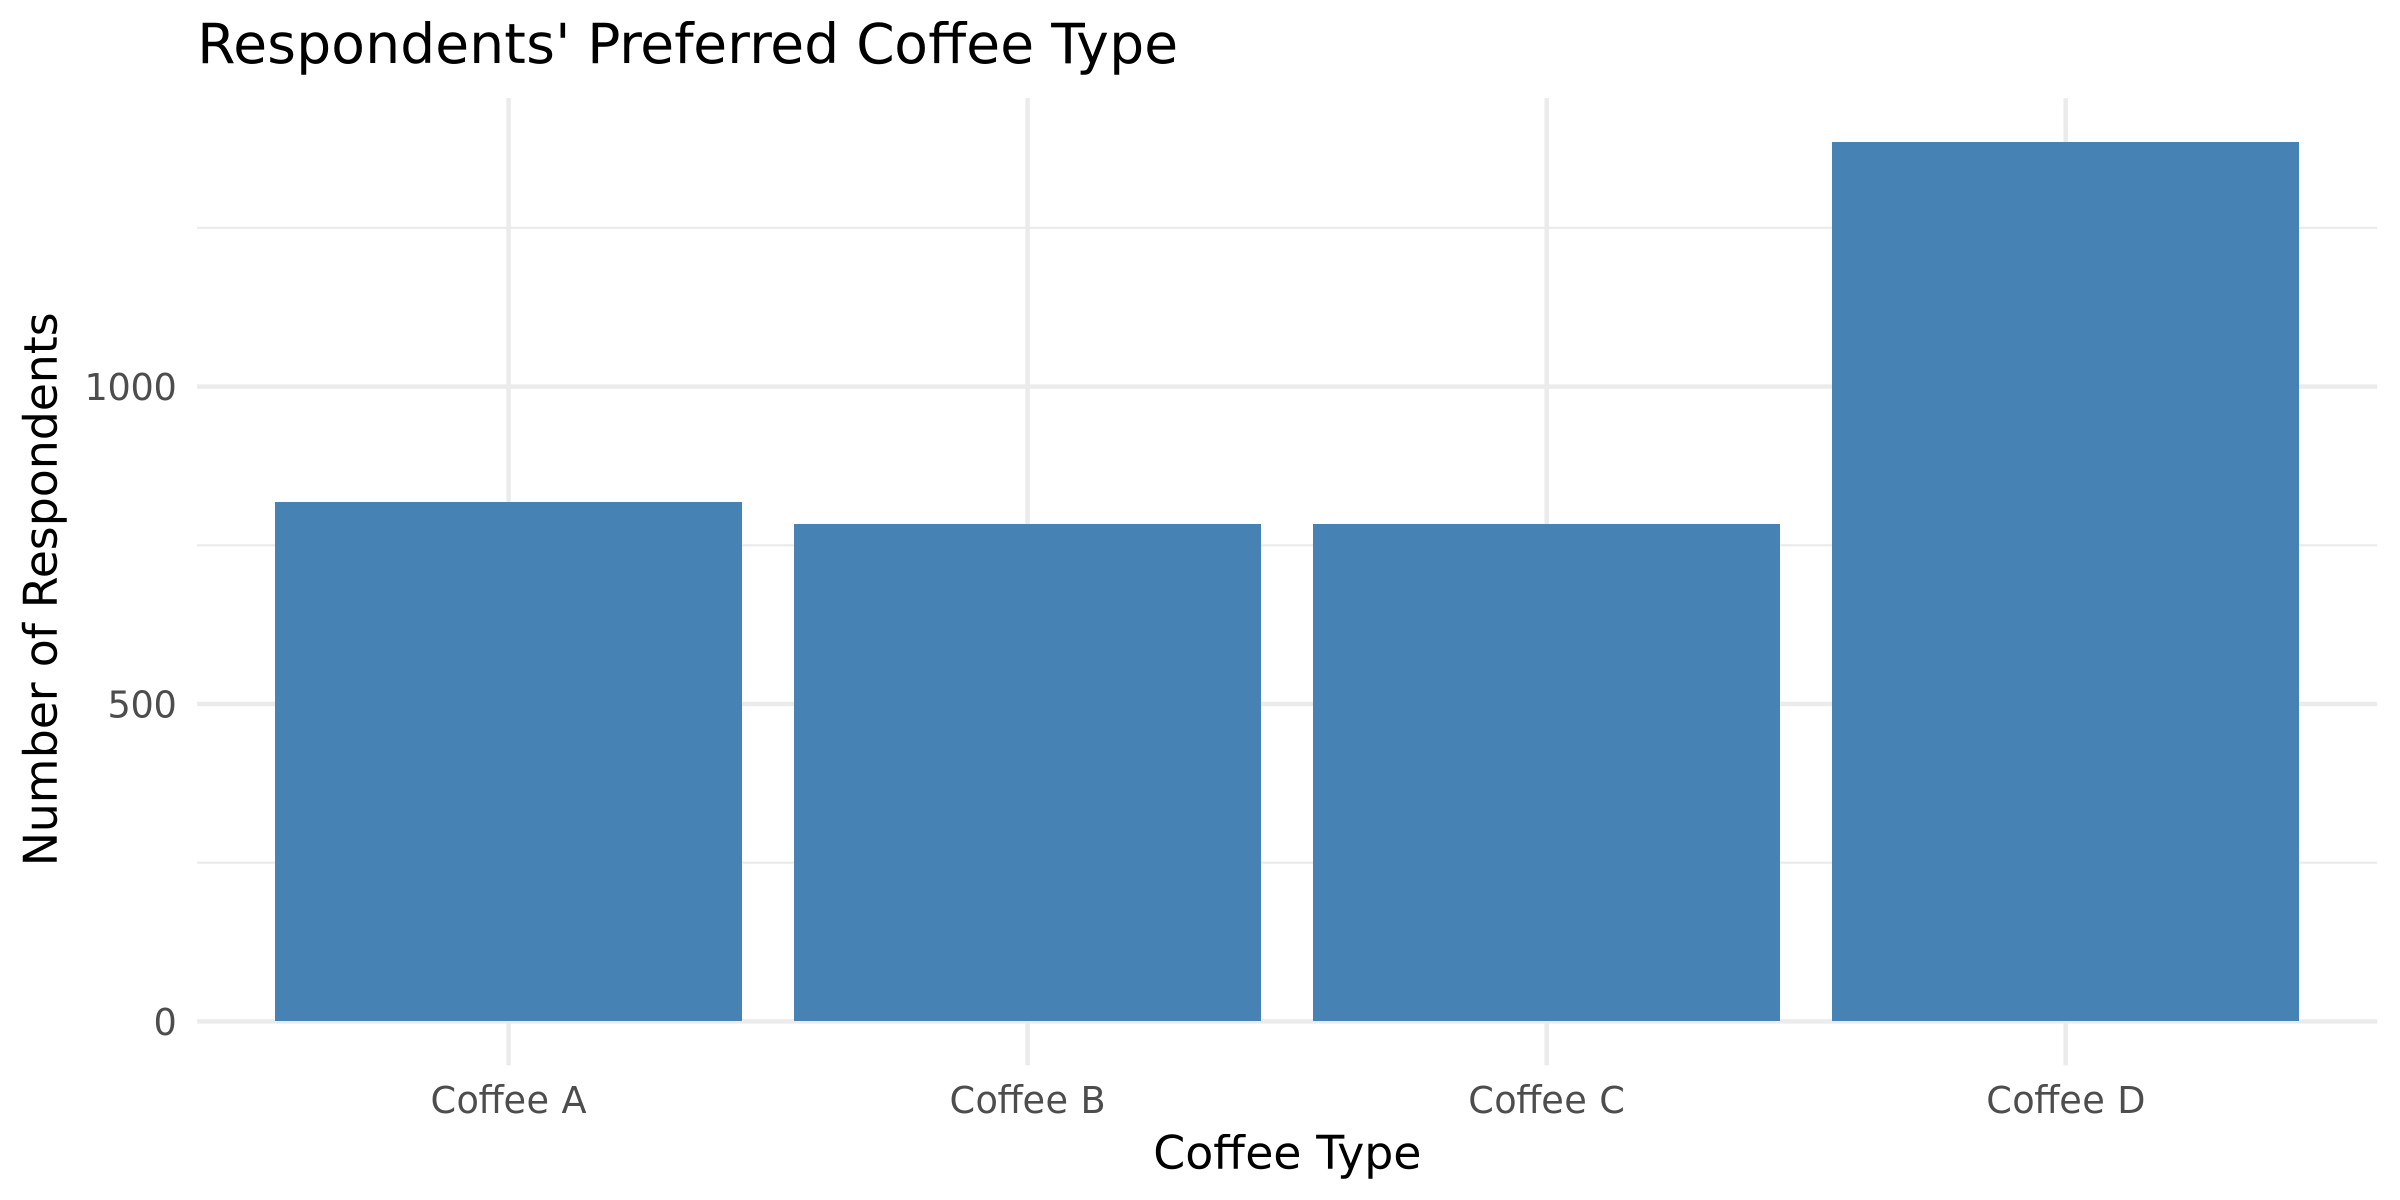

In [6]:
#Let's examine the overall coffee preference for surveyed respondents

coffee |>
    filter(!is.na(prefer_overall)) |>
    ggplot(aes(x = prefer_overall)) +
    geom_bar(na.rm = TRUE, fill = 'steelblue') +  
    labs(title = "Respondents' Preferred Coffee Type ",
       x = "Coffee Type",
       y = "Number of Respondents ") +
    theme_minimal() 

Warning message:
“Removed 2165 rows containing non-finite outside the scale range
(`stat_count()`).”


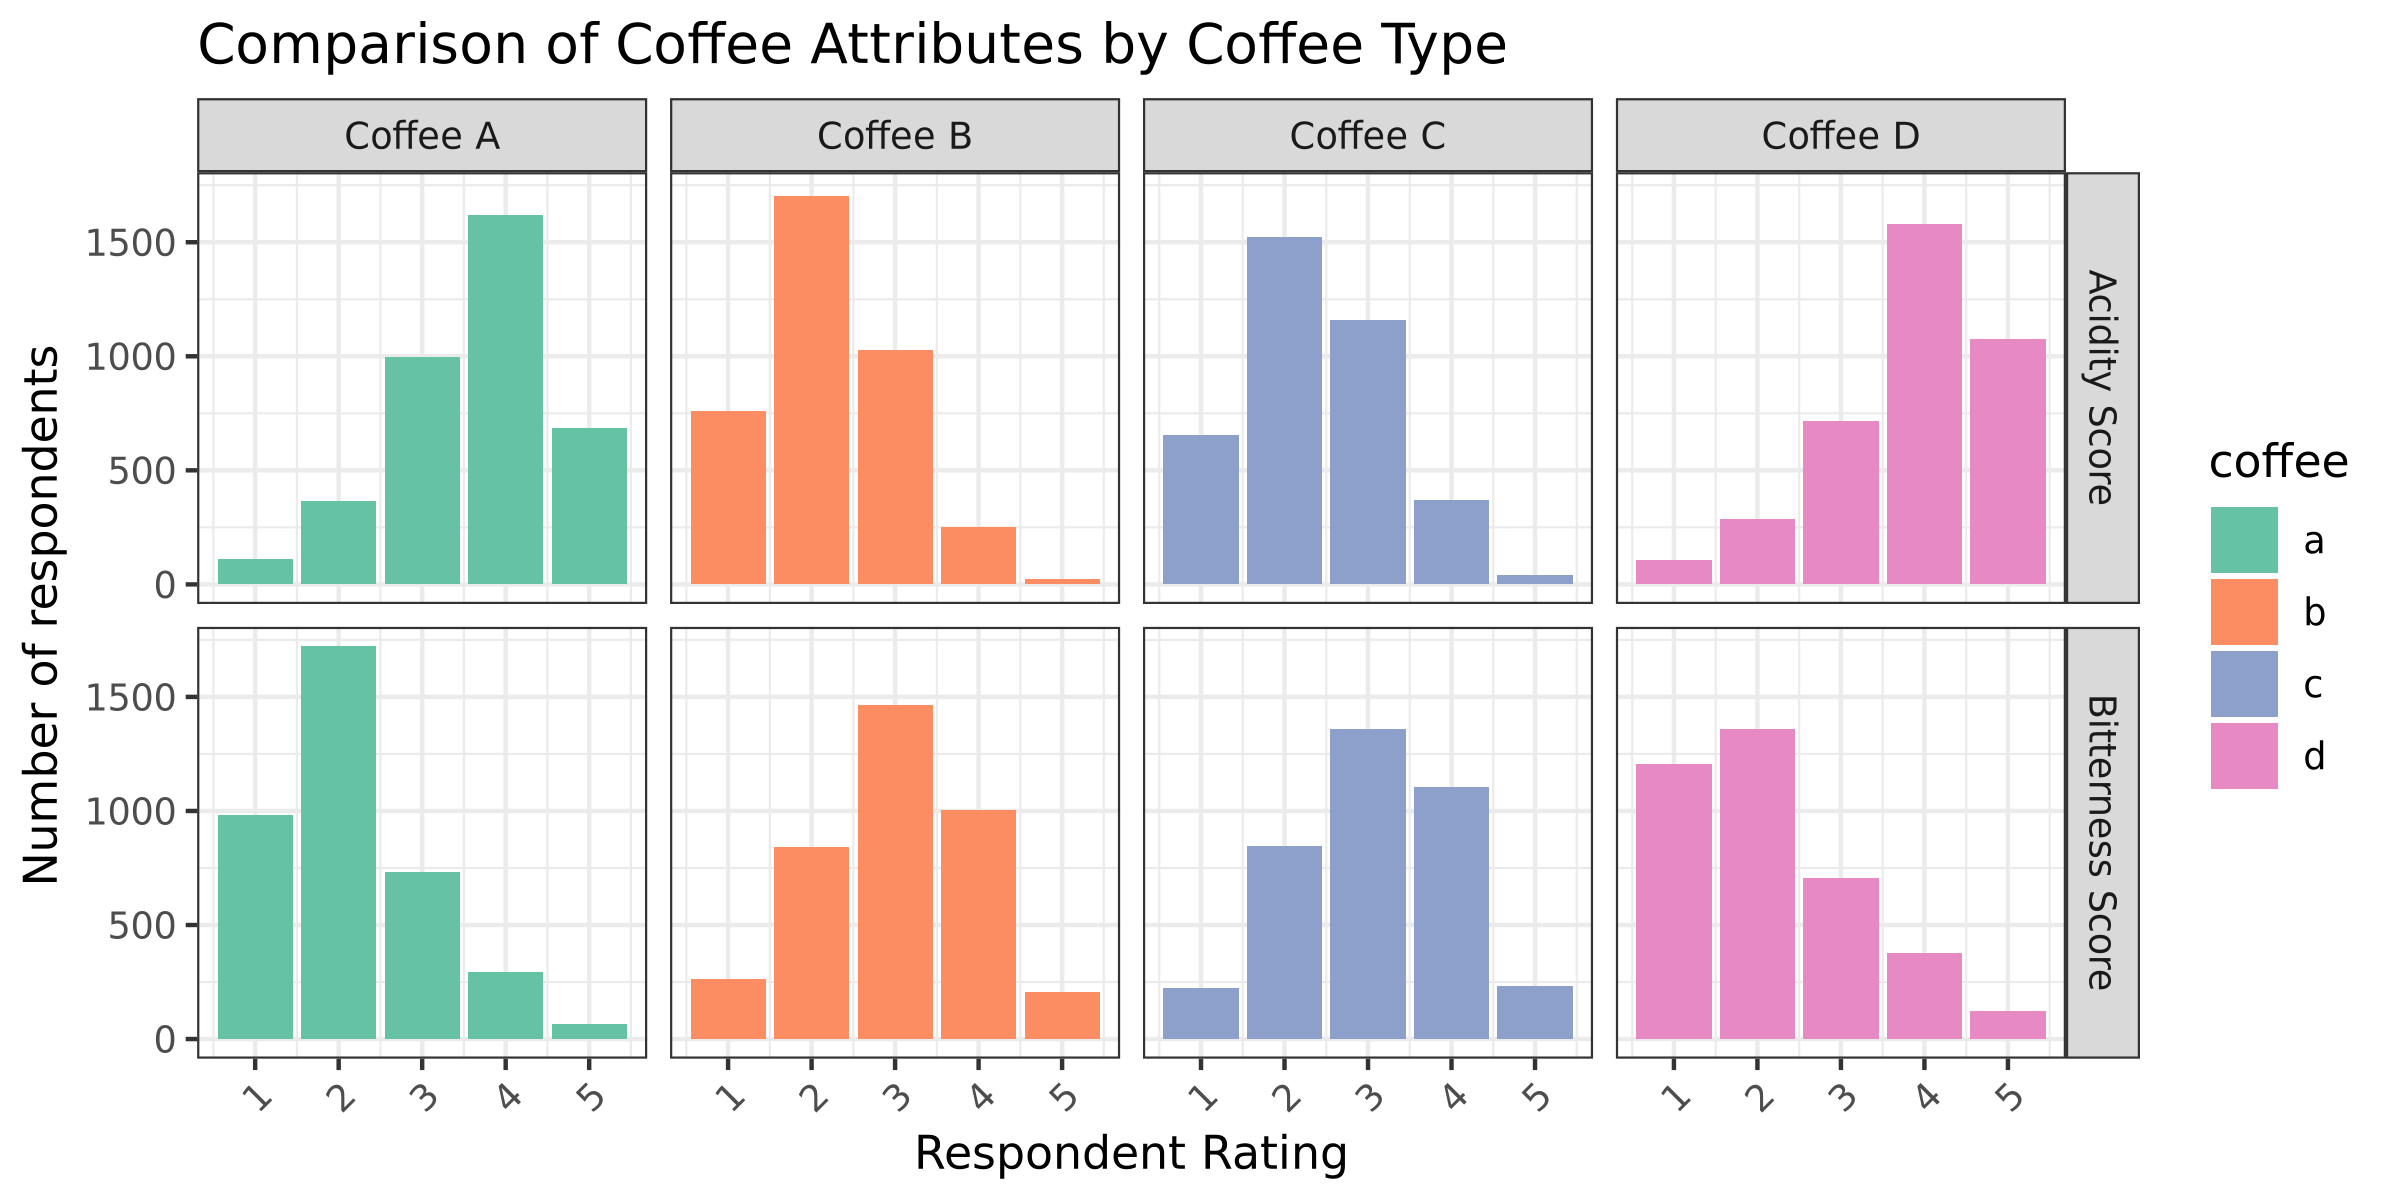

In [7]:
#The above shows that coffee D was preferred by most respondents. 
#Let's look at acidity and bitterness ratings for each coffee type

coffee |>
  select(starts_with("coffee"),
         -ends_with("notes"),
         -ends_with("personal_preference")  
        ) |>
  pivot_longer(
    cols = everything(),
    names_to = c("coffee", "measure"),
    names_prefix = "coffee_",
    names_sep = "_",
    values_to = "value"
  ) |>
  ggplot(mapping = aes(x = value, fill = coffee)) +
  geom_bar() +
   facet_grid(
    rows = vars(measure), 
    cols = vars(coffee),
    labeller = labeller(
      measure = c(acidity = "Acidity Score", bitterness = "Bitterness Score"),
      coffee = c(a = "Coffee A", b = "Coffee B", c = "Coffee C", d = "Coffee D")
    )
  ) +
  labs(
    title = "Comparison of Coffee Attributes by Coffee Type",
    x = "Respondent Rating",
    y = "Number of respondents"
  ) +
  theme_bw() +
    scale_fill_brewer(palette = "Set2") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x labels for readability

**Plot discussion:**

Prior to making the plot, I imagined I might notice consistent trends in bitterness or acidity ratings for Coffee D to potentially account for its more frequent preference among respondents. However, the only striking observation I made was that more respondents gave D the maximum acidity rating (5) than all the other coffee types. Additionally, the next highest acidity rating (4) had an almost equal distribution for coffee A and D, and coffee A is the coffee type with the 2nd best preference. I don't really drink coffee myself but online forums seem to value acidity in coffee so this might be noteworthy. 

In [8]:
# Is there an association between employment status and expenditure on coffee equipment?

coffee |> 
    filter(!is.na(employment_status) & !is.na(total_spend)) |>
    group_by(employment_status, total_spend) |>
    summarize(N = n())

`summarise()` has grouped output by 'employment_status'. You can override using
the `.groups` argument.


employment_status,total_spend,N
<chr>,<chr>,<int>
Employed full-time,$20-$40,964
Employed full-time,$40-$60,827
Employed full-time,$60-$80,307
Employed full-time,$80-$100,178
Employed full-time,<$20,288
Employed full-time,>$100,114
Employed part-time,$20-$40,71
Employed part-time,$40-$60,53
Employed part-time,$60-$80,14


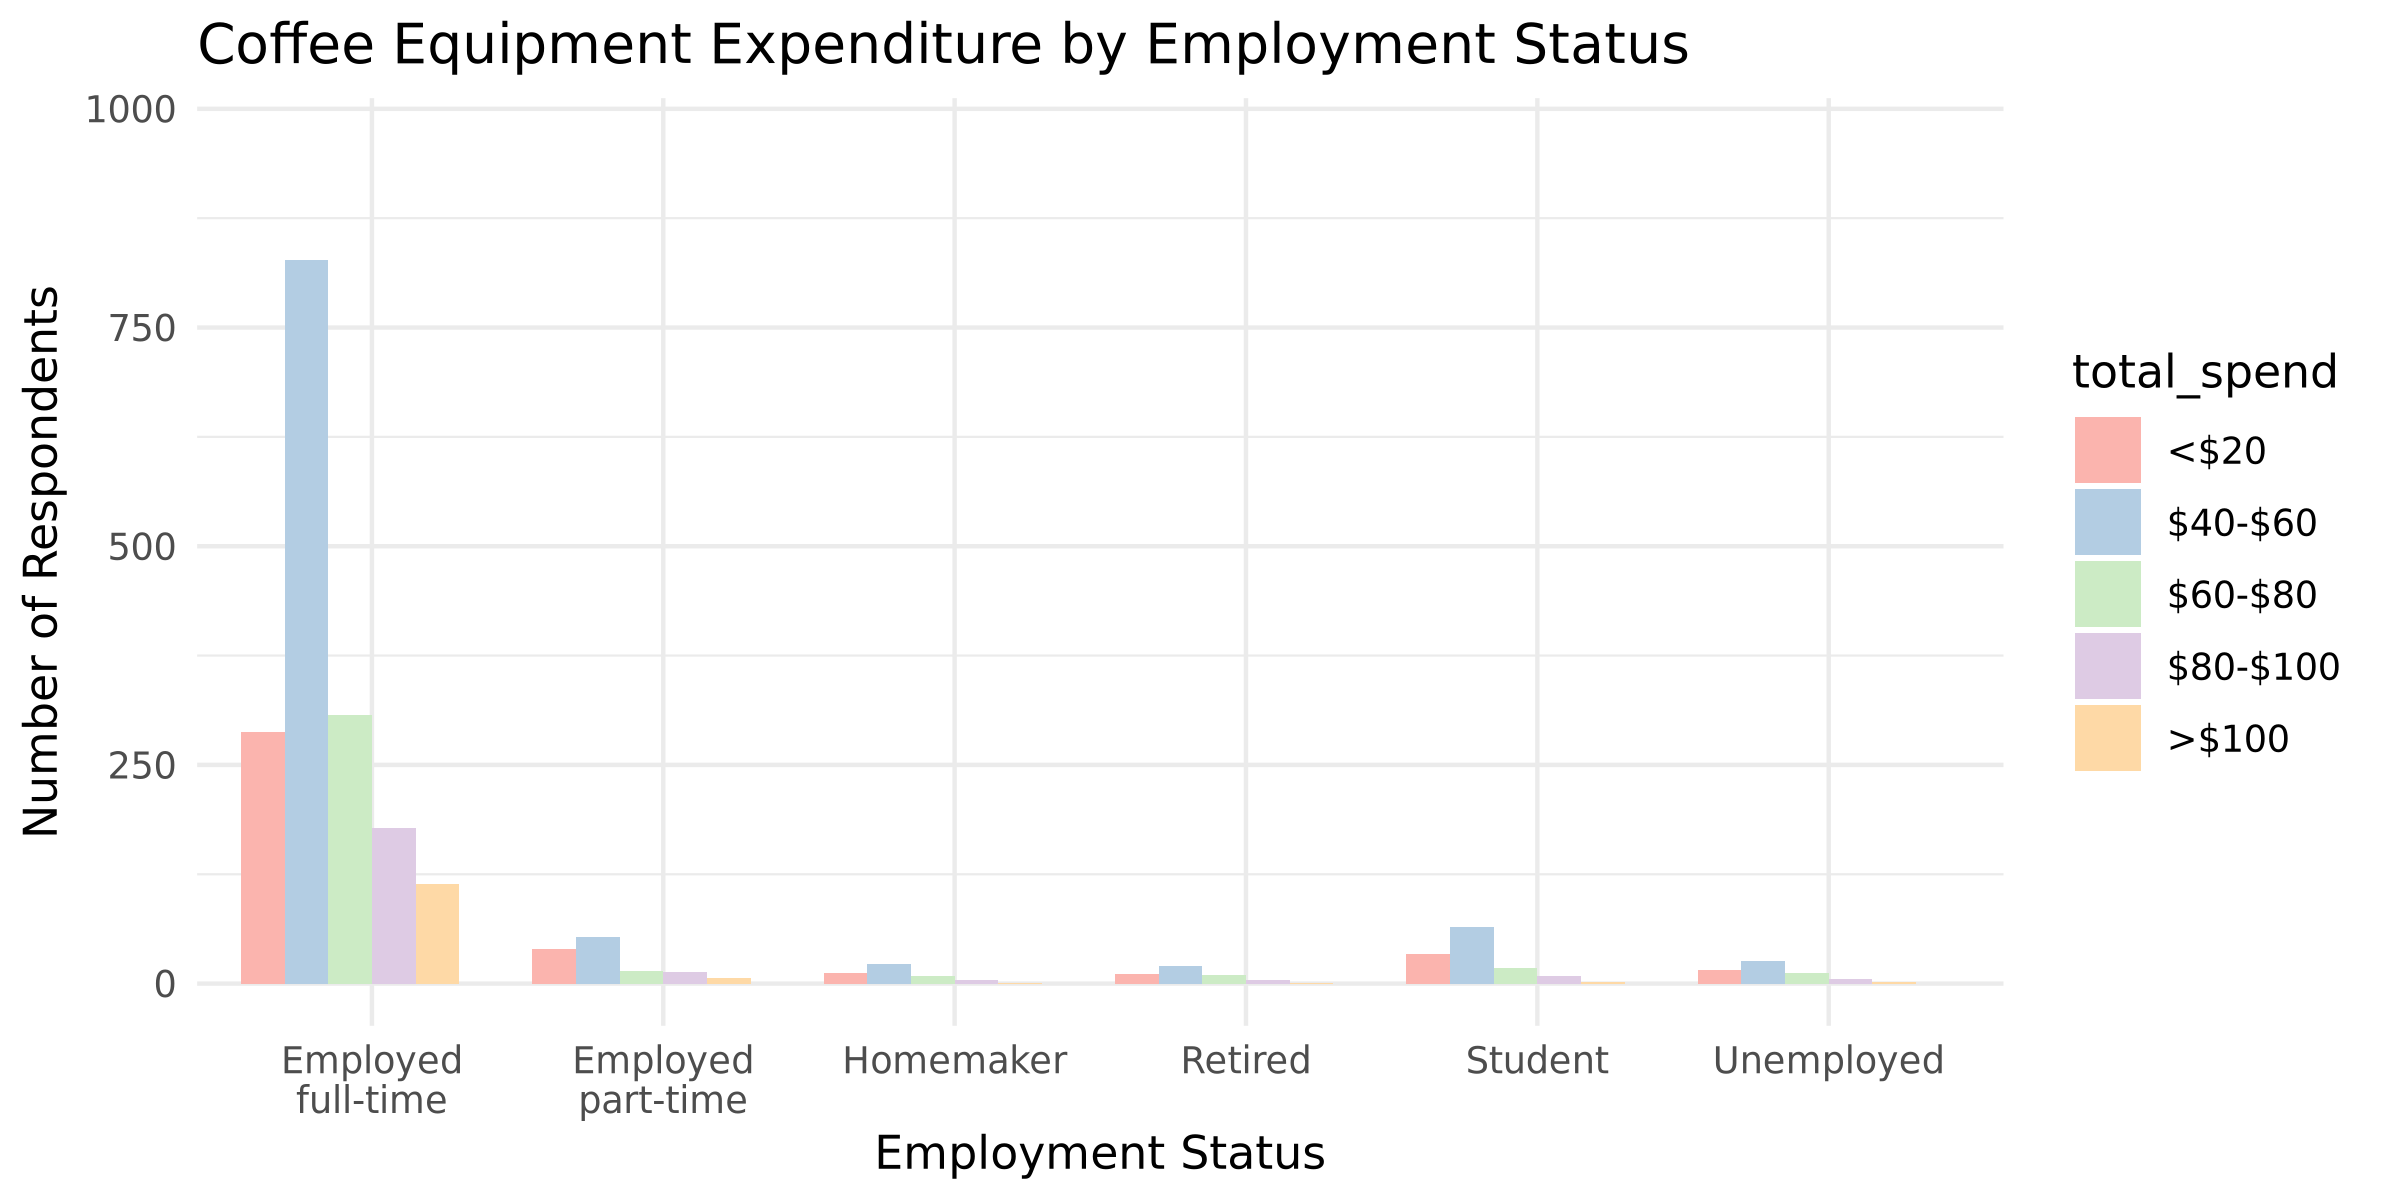

In [9]:
employ_spend = coffee|> 
    filter(!is.na(employment_status) & !is.na(total_spend)) |>
    mutate(total_spend = factor(total_spend, 
                        levels = c("<$20", "$20−$40", "$40-$60", "$60-$80", "$80-$100", ">$100"),
                            ordered = TRUE))  # Define levels and order

# Plotting the distribution of coffee consumption by age group
ggplot(employ_spend, aes(x = employment_status, fill = total_spend)) +
    geom_bar(position = "dodge", na.rm = TRUE) +  
    labs(title = "Coffee Equipment Expenditure by Employment Status",
       x = "Employment Status",
       y = "Number of Respondents") +
    theme_minimal() +
    scale_fill_brewer(palette = "Pastel1", na.translate = FALSE) +
    scale_x_discrete(labels = function(x) str_wrap(x, width = 10))

**Interpretation of plot:**

Most respondents are employed full-time. For all categories of employment status, 40 dollars was the most common amount spent on coffee equipment in the past 5 years. Almost all the respondents who spend over 100 dollars on coffee equipment are full-time employees. A possible reason for this is higher disposable income.